In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud

In [16]:
df = pd.read_csv("../data/raw/Reviews.csv")

In [17]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [18]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (568454, 10)


In [19]:
print("Column Data Types in the dataframe:\n\n", df.dtypes)

Column Data Types in the dataframe:

 Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


In [20]:
print("Number of NULL values in the columns:\n\n", df.isnull().sum())

Number of NULL values in the columns:

 Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [21]:
print("Number of duplicates in the dataframe:", df.duplicated().sum())

Number of duplicates in the dataframe: 0


In [22]:
# Drop rows with missing Summary and ProfileName
df = df.dropna(subset = ['Summary', 'ProfileName'])

### Sentiment Mapping and Distribution

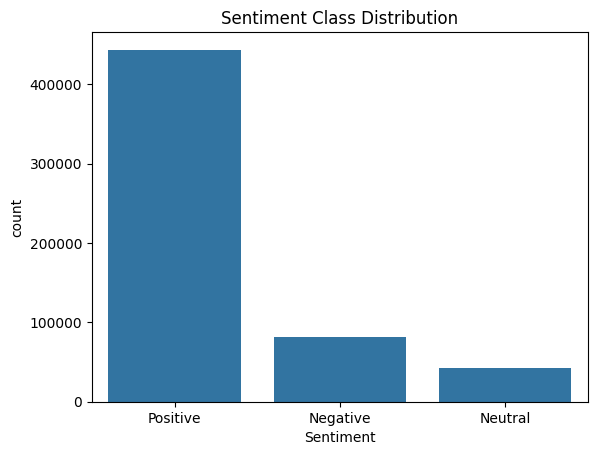

In [24]:
def map_score(score):
    if score in [4, 5]:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Score'].apply(map_score)

# Plot class distribution
sns.countplot(x = 'Sentiment', data = df)
plt.title('Sentiment Class Distribution')
plt.show() 

### Time-Based Trends

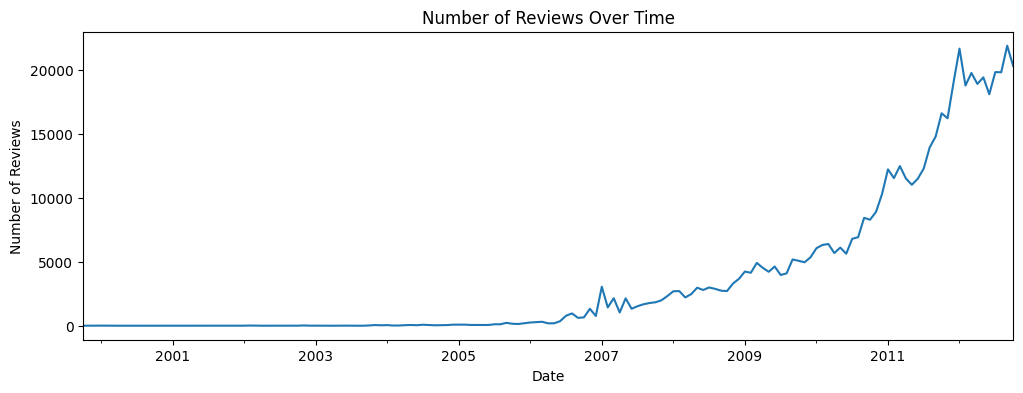

In [25]:
df['Date'] = pd.to_datetime(df['Time'], unit = 's')
monthly = df.set_index('Date').resample('M').size()

plt.figure(figsize = (12, 4))
monthly.plot()
plt.title("Number of Reviews Over Time")
plt.ylabel("Number of Reviews")
plt.show()

### Top Products by Review Count

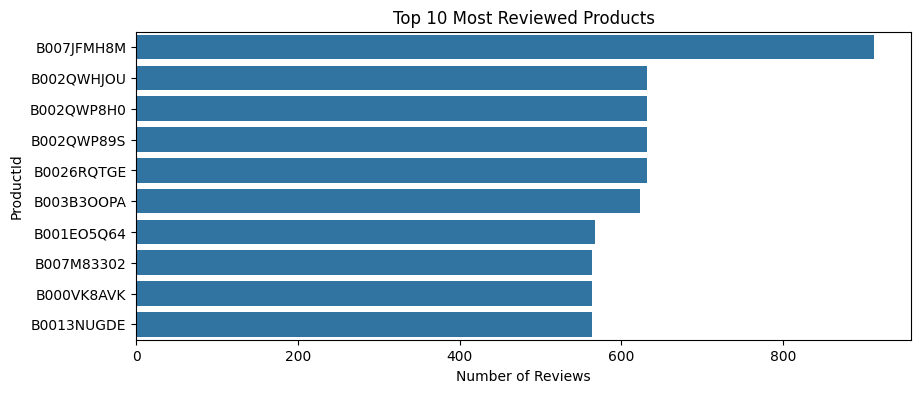

In [26]:
top_products = df['ProductId'].value_counts().head(10)

plt.figure(figsize = (10, 4))
sns.barplot(x = top_products.values, y = top_products.index)
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('ProductId')
plt.show()

### Review Length Analysis

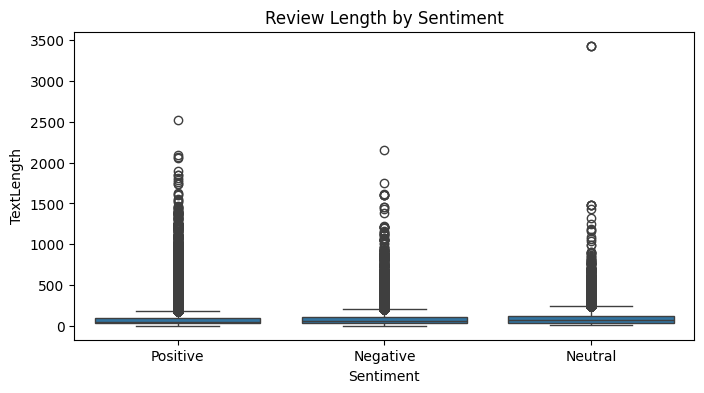

In [27]:
df['TextLength'] = df['Text'].apply(lambda x: len(x.split()))

plt.figure(figsize = (8, 4))
sns.boxplot(x = 'Sentiment', y = 'TextLength', data = df)
plt.title("Review Length by Sentiment")
plt.show()

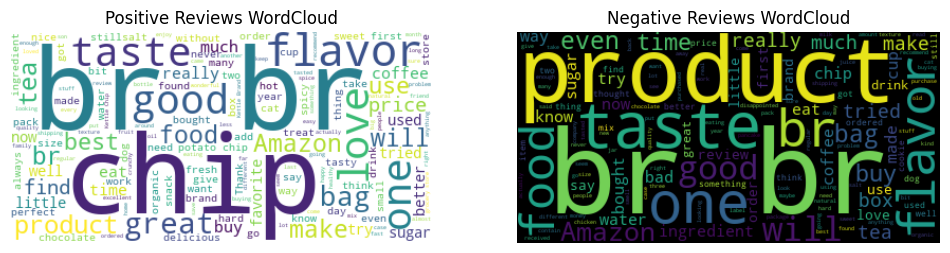

In [30]:
from wordcloud import STOPWORDS

# Positive reviews
text_pos = ' '.join(df[df['Sentiment'] == 'Positive']['Text'][:1000])
wordcloud_pos = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text_pos)

# Negative reviews
text_neg = ' '.join(df[df['Sentiment'] == 'Negative']['Text'][:1000])
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color='black').generate(text_neg)

# Plot both
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation = 'bilinear')
plt.title('Positive Reviews WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation = 'bilinear')
plt.title('Negative Reviews WordCloud')
plt.axis('off')
plt.show()


### Sentiment vs Review Length Distribution

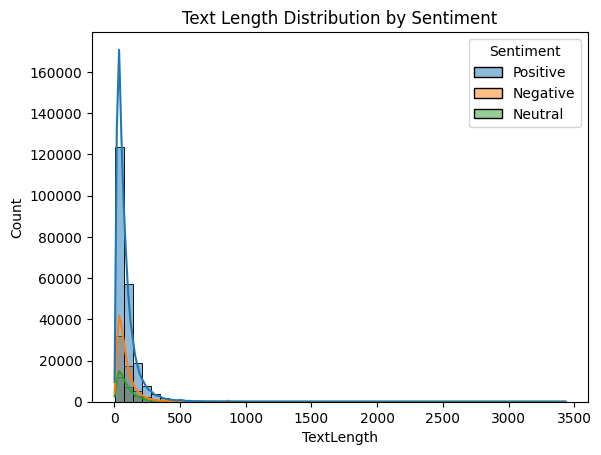

In [34]:
sns.histplot(data=df, x='TextLength', hue='Sentiment', bins=50, kde=True)
plt.title("Text Length Distribution by Sentiment")
plt.show()

C:\Users\uddit\AppData\Local\Temp\ipykernel_42812\2595862896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['Date'].dt.to_period('M')


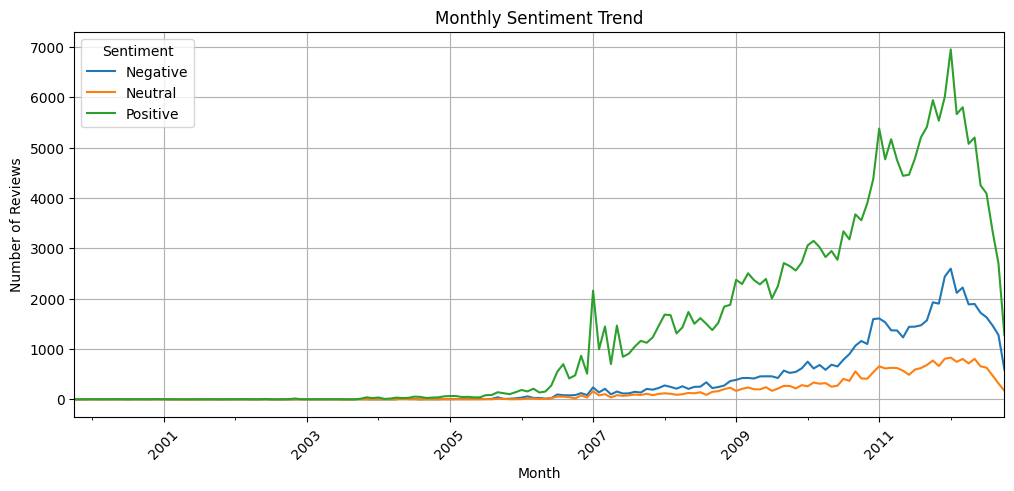

In [36]:
df['YearMonth'] = df['Date'].dt.to_period('M')
sentiment_trend = df.groupby(['YearMonth', 'Sentiment']).size().unstack().fillna(0)

sentiment_trend.plot(figsize=(12, 5))
plt.title("Monthly Sentiment Trend")
plt.ylabel("Number of Reviews")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid()
plt.show()